# Active User - Predictive Modeling
***
# 1. Cleaning, Exploratory Analysis & Visualizations
### Import Necessary Libraries & Load Dataset

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

In [2]:
# load ultimate dataset
raw_ultimate = pd.io.json.json_normalize(json.load(open('ultimate_data.json')))

# display ultimate dataset
print('Ultimate Dataset:')
display(raw_ultimate)

# print missing data counts
print('Is NaN:\n\n{}'.format(raw_ultimate.isna().sum()))

Ultimate Dataset:


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


Is NaN:

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


## 1.1. Preprocessing (Cleaning)
### Missing Data
As it can be seen from the missing data summary above, the raw ultimate dataset contains missing data in a few columns. Since much of the missing data corresponds to non-active users, which there is way more of than active users, we will just remove rows with missing data in them. Below is an updated count of missing data after performing the removal of rows with missing data. 

In [3]:
# drop rows with missing data
raw_ultimate.dropna(inplace=True)

# updated number of missing values in dataset
print('Is NaN:\n\n{}'.format(raw_ultimate.isna().sum()))

Is NaN:

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


### Create Active Column
Using the last trip date column, we can classify a user as either active or non-active; if their last trip date falls on the month of June, which is the last month tested for, they are classified as active users.

In [30]:
# create a copy dataset to clean
ultimate = pd.DataFrame(raw_ultimate).rename(columns={'signup_date':'signup_day'})
# signup day to integer
ultimate.signup_day = pd.to_datetime(ultimate.signup_day).dt.day / 10

# last trip date to datetime data type
ultimate.last_trip_date = pd.to_datetime(raw_ultimate.last_trip_date)
# create active column based on activity of the last month
ultimate['active'] = (ultimate.last_trip_date.dt.month == 6)
# drop last_trip_date column
ultimate.drop(columns='last_trip_date', inplace=True)

# display updated dataset
print('Updated Ultimate Dataset:')
display(ultimate)

# calculate & show active user ratio
active_ratio = np.mean(ultimate.active)
print('Active to Non Ratio: {:.2f}'.format(active_ratio))

Updated Ultimate Dataset:


,city,trips_in_first_30_days,signup_day,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2.5,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2.9,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,0.6,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,1.0,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2.7,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,0.3,4.8,1.11,iPhone,11.1,True,55.6,2.53,4.7,False
49994,Astapor,1,0.3,4.6,1.44,iPhone,37.5,False,25.0,2.25,4.5,False
49995,King's Landing,0,2.5,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,True
49997,Winterfell,0,3.1,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,False


Active to Non Ratio: 0.40


> **Active User Ratio:**
> As it can be seen above, about 40% of the users who signed up for Ultimate's services classified as active users.

### Feature Normalization
In order to avoid outliers or skewed data to affect our predictive model's performance, the functions log and tanh functions will be applied to certain numerical columns.

In [5]:
# display original dataset statistics
print('Original Feature Stats:')
display(raw_ultimate.describe())

Original Feature Stats:


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,2.609675,4.601720,1.073822,8.898709,61.254897,5.460046,4.776446
std,4.059336,0.616104,0.198747,18.322061,34.813848,5.145174,0.404606
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.780000,5.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000


In [6]:
# Normalize columns using log
ultimate.trips_in_first_30_days = np.log(raw_ultimate.trips_in_first_30_days + 1)
ultimate.surge_pct = np.log(raw_ultimate.surge_pct + 10)
ultimate.weekday_pct = np.log(raw_ultimate.weekday_pct + 1)
ultimate.avg_dist = np.log(raw_ultimate.avg_dist + 1)

# Normalize columns using tanh
ultimate.avg_surge = np.tanh(raw_ultimate.avg_surge * 0.5 - 2.25)
ultimate.avg_rating_of_driver = np.tanh(raw_ultimate.avg_rating_of_driver * 0.5 - 1.5) 
ultimate.avg_rating_by_driver = np.tanh(raw_ultimate.avg_rating_by_driver * 0.5 - 1.5)

# standardized & normalized ultimate dataset's statistics
print('Standardized & Normalized Feature Stats:')
display(ultimate.describe())

Standardized & Normalized Feature Stats:


,trips_in_first_30_days,signup_day,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,0.935424,1.646775,0.636411,-0.935431,2.688732,3.582965,1.658319,0.698049
std,0.780050,0.873806,0.224232,0.027751,0.615877,1.551596,0.606926,0.141455
min,0.000000,0.100000,-0.761594,-0.941376,2.302585,0.000000,0.000000,-0.761594
25%,0.000000,0.900000,0.571670,-0.941376,2.302585,3.650658,1.229641,0.691069
50%,0.693147,1.700000,0.739783,-0.941376,2.302585,4.215086,1.564441,0.761594
75%,1.386294,2.400000,0.761594,-0.937258,3.049273,4.615121,2.013569,0.761594
max,4.836282,3.100000,0.761594,0.941376,4.700480,4.615121,4.390615,0.761594


> **Normalized Columns:**
> Columns with a wide range and highly sweked values were normalized with the log function which treats 1, 10 and 100 much more similar than a linear scale does; columns under this category were the trips in first 30 days, surge percentage, weekday percentage and average distance columns. Further, if columns did not span a wide range of values but were highly skewed, normalization was applied to them using the tanh function; columns under this category were the average rating of driver, average rating by driver and average surge columns.

## 1.2. Data Exploration & Visualization
### Feature vs. Active Correlations
Here we will look at what features correlate the most with a user being either active or non-active. The closer a feature's correlation value is to +/- 1, the stronger the correlation between the feature and the user's active status; if a feature's correlation value is close to a value of +1, it means that the probability of a user being active increases as that feature increases as well, but if it is closer to -1, then it means that the probability of a user being active decreases as that feature's value increases. 

In [7]:
# one-hot encode categorical features & get correlations
ult_corr = pd.get_dummies(ultimate, columns=['city', 'phone'], drop_first=False).corr()

# filter for feature correlations w.r.t. active users
act_corr = ult_corr.active.sort_values(ascending=False)[1:]

# print correlations w.r.t. active status
print('Active User Correlations:\n\n{}'.format(act_corr))

Active User Correlations:

city_King's Landing       0.246630
phone_iPhone              0.227386
ultimate_black_user       0.211595
trips_in_first_30_days    0.173995
weekday_pct               0.143555
surge_pct                 0.105713
avg_rating_of_driver      0.005576
avg_rating_by_driver      0.004203
signup_day               -0.013999
avg_surge                -0.025779
city_Winterfell          -0.039257
avg_dist                 -0.040326
city_Astapor             -0.173199
phone_Android            -0.227386
Name: active, dtype: float64


> **Feature vs. Active Correlations:**
> As it can be seen from above, the strongest positive correlations belong to whether or not the user belongs to King's Landing, if they have an iPhone and/or if they are a black ultimate user. On the other hand, the strongest negative feature correlations to a user being active were the user having an Android phone and/or whether they belong to the city of Astapor. We will explore this correlations in further detail below. 

### Balanced Dataset w/ Equal Active & Non-Active Users
In order to accurately compare how active and non-active users correlate with certain features, we have to create a balanced dataset that contains an equal number of active and non-active users. We can do this by only keeping a random sample of non-active users equal in size to the number of active users; we can keep all active users, since there are less active users than non-active users.

In [8]:
# boolean mask of active users
active = ultimate.active
# number of active users
len_act = active.sum()

# active users dataset
bal_act = ultimate[active]
# random sample of non-active users 
bal_nact = ultimate[~active].sample(len_act)

# concatenate balanced datasets
balanced = pd.concat([bal_act, bal_nact])

### Balanced Dataset Grouped by Select Features
Once a balanced dataset has been created, we can now visualize the categorical features with the highest correlation to a user's active status. We can do this by grouping users into their respective category and counting the number of active vs. non-active users within each category.

In [9]:
def bar_config(width, categories):
    """ Configure x-tick & bar locations for bar plot (using # of categories being plotted) """
    
    # set x tick locations
    loc = np.arange(len(categories))
    # set left bar midpoint 
    left_mid = loc - width / 2
    # set rigtht bar midpoint
    right_mid = loc + width / 2
    
    # return x-tick locations & left and right bar midpoints
    return loc, left_mid, right_mid

In [10]:
def bar_active_feature(feature, width):
    """ Plot side-by-side bar plots of select features """
    
    # group by select feature & count # of active & non-active users
    feat = balanced.groupby(by='active')[feature].value_counts().sort_index()
    # get categories of select feature
    categories = feat.loc[0].index
    # use bar_config function to get x-tick & bar locations
    x_tick, left_bar, right_bar = bar_config(width, categories)
    
    # plot left bar (Non-active Users)
    plt.bar(left_bar, feat.loc[0], width, label='Not Active')
    # plot right bar (Active Users)
    plt.bar(right_bar, feat.loc[1], width, label='Active')
    # set x-tick locations
    plt.xticks(x_tick, categories)
    # plot title
    plt.title('Active vs. Non-active Users (Grouped by ' + feature.capitalize() + ')')
    # x-axis label
    plt.xlabel(feature.capitalize())
    # y-axis label
    plt.ylabel('# Users')
    # set legend
    plt.legend()
    
    # show plot
    plt.tight_layout()
    plt.show()

#### *Grouped by City*

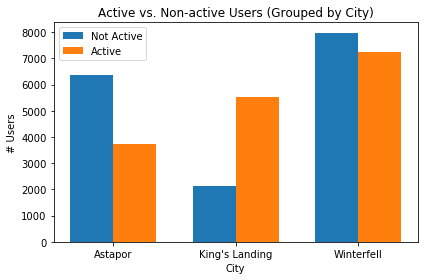

In [11]:
# users grouped by city
bar_active_feature('city', 0.35)

> **Active Users by City:**
> From the bar plot above, we can confirm the results obtained from the feature correlation values; when looking at the cities individually, the city of Astapor contains almost twice as many non-active users as active ones. Further, this disparity between the type of user is even more pronounced when looking at users from the city of King's Landing; in King's Landing, there are more than twice active users than there are non-active. Therefore, supplying the city feature to our predictive model will prove useful when predicting whether a user will be active or non-active.

#### *Grouped by Phone Type*

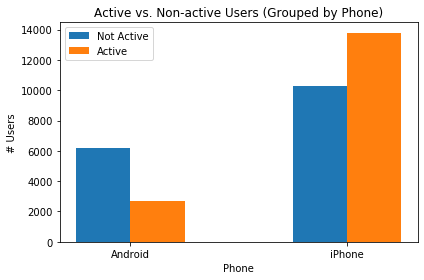

In [12]:
# users grouped by phone type
bar_active_feature('phone', 0.25)

> **Active Users by Phone Type:**
> The relationship between phone type and whether or not a user will be active can be seen on the plot above; if a user uses an Android phone, they are more likely to be a non-active user than an active one, but if a user utilizes an iPhone, they are more likely to be an active user than a non-active.

#### *Grouped by Ultimate Black User (Binary)*

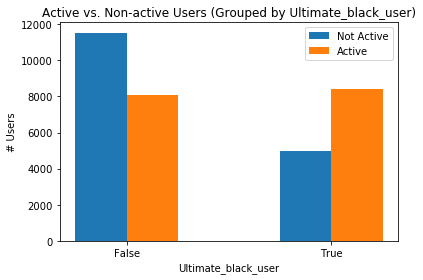

In [13]:
# users grouped by whether they are an ultimate black user
bar_active_feature('ultimate_black_user', 0.25)

> **Active Users by Ultimate Black User:**
> Finally, whether a user is an ultimate black user also has potential in helping our predictive model predict whether or not a user will be active; if a user is an ultimate black user, they are more likely to be an active user. On the other hand, if a user is not an ultimate black user, then there is also a higher possibility that they will not be an active user. 

### Feature Importances
Above, we statistically measured feature correlations using the Pearson correlation. However, below we can use a predictive model known as the Extremly Randomized Trees classifier, or ExtraTrees classifier, to get the features' importances; feature importances deduced from this classifier tell us what features help the classifier get as much information as possible and keep computation to a minimum. The closer to +1 a feature's importance is, the more helpful that feature is. 

In [14]:
# import sklearn's ensemble library
import sklearn.ensemble as ensemble

# create new ultimate dataset w/ dummy categorical variables
ult_dummy = pd.get_dummies(ultimate, columns=['city', 'phone'], drop_first=True).drop(columns='active')

# instantiate ExtraTrees Classifier
ET_model = ensemble.ExtraTreesClassifier()
# fit classifier
ET_model.fit(ult_dummy, active)

# get classifier feature importances
feat_imp = pd.Series(ET_model.feature_importances_, index=ult_dummy.columns).sort_values(ascending=False)

# display feature importances
print('Feature Importances:\n\n{}'.format(feat_imp.to_string()))

Feature Importances:

avg_dist                  0.184287
weekday_pct               0.138986
signup_day                0.130673
avg_rating_by_driver      0.097322
avg_rating_of_driver      0.089136
trips_in_first_30_days    0.082025
surge_pct                 0.081454
city_King's Landing       0.057215
avg_surge                 0.047478
ultimate_black_user       0.040260
phone_iPhone              0.039978
city_Winterfell           0.011185


> **Feature Importances:**
> From above, we can see that ExtraTrees classified the average distance traveled by a user as one of the most important features used to predict whether or not a user would be active; since the average distance's importance outweighed all other features' importances, we will look into it below.

#### *Average Distance & Correlations*
Here we will analyze what makes a person want to travel longer distances on average. 

In [15]:
# get unprocessed distance values
raw_dist = raw_ultimate.avg_dist

# active users' avg distances
act_dist = raw_dist[active]
# non-active users' avg distances
nact_dist = raw_dist[~active]

# get user avg distance statistics & create dataframe
dist_stats = pd.concat([act_dist, nact_dist], axis=1).describe().rename_axis('Statistic').round(2)
# rename columns
dist_stats.columns = ['Active', 'Not_Active']

# display important avg_dist statistics
print('Average Distance Statistics:')
display(dist_stats.iloc[[1,3,4,5,6,7]])

Average Distance Statistics:


,Active,Not_Active
Statistic,,
mean,4.93,5.81
min,0.00,0.00
25%,2.57,2.31
50%,3.69,3.87
75%,5.68,7.20
max,79.34,79.69


> **Average Distance Statistics:**
> Surprisingly, active and non-active users have similar average distance statistics; however, the mean average distance is significantly less for an active user than it is for a non-active user. This can lead us to conclude that the longer users need to travel the less they will use Ultimate's taxi service; since longer drives cost more for the user, it makes sense for users that constantly travel long distances to want to avoid the need of using the ride sharing service in order to save money.

In [16]:
# get avg_dist correlations
dist_corr = ult_corr.avg_dist.sort_values(ascending=False)[1:].to_string()

# display correlations
print('Average Distance Correlations:\n\n{}'.format(dist_corr))

Average Distance Correlations:

avg_rating_by_driver      0.078683
weekday_pct               0.047616
ultimate_black_user       0.039383
avg_rating_of_driver      0.024722
phone_Android             0.023232
city_Winterfell           0.021789
city_King's Landing       0.018131
signup_day                0.011840
phone_iPhone             -0.023232
city_Astapor             -0.038979
active                   -0.040326
avg_surge                -0.048299
trips_in_first_30_days   -0.128537
surge_pct                -0.136730


> **Average Distance Correlations:**
> Now, when it comes to understanding what makes a user have a higher average distance we can perform Pearson's correlation again; it can be noted that the strongest correlations to the average distance of a user are the number of trips in the first 30 days of signing up and the surge percentage. Both of these correlations are negative correlations which makes sense, because the more trips you make the costlier it is to pay for said trips, especially if they are all long distances; therefore, the more a user uses Ultimate's taxi service, the less likely they will be traveling long distances. Further, the higher the surge percentage, the less likely a user will be taking long distances; since higher surge percentages mean the rider gets charged more per trip, it also makes sense for a user with a high number of trips with high surges to decrease their average distance traveled. 

***
# 2. Predictive Modeling

In [17]:
# import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
import sklearn.metrics as metric

# import additional libraries
import sklearn.model_selection as mod_sel
import sklearn.decomposition as decomp

## 2.1. Principal Component Analysis
Principal Component Analysis, or PCA, helps capture the dataset's variance into components which can be used to transform the original dataset; PCA is used to reduce the number of dimensions the predictive model has to learn by allowing the user to keep the most relevant data, i.e. components. Below we will fit our dataset to an PCA instance and observe the optimum number of components to keep. 

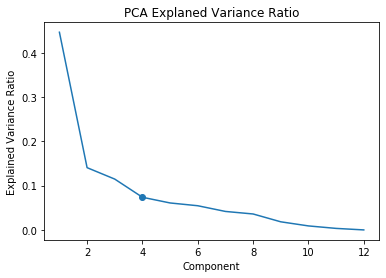

Cumulative Explained Variance by Top 4 Components: 0.78


In [18]:
# fit PCA to processed ultimate dataset
pca = decomp.PCA().fit(ult_dummy)

# individual component explained variance ratio
exp_var = pca.explained_variance_ratio_

# cumulative explained variance ratio
cum_exp_var = np.cumsum(exp_var)

# best # of components (using elbow method)
n_pca = 4

# plot explained variance ratio vs. components 
plt.plot(range(1, len(exp_var)+1), exp_var)
# plot a point marking PCA component cutoff
plt.scatter(n_pca, exp_var[n_pca-1])
# plot title
plt.title('PCA Explaned Variance Ratio')
# plot x-axis label
plt.xlabel('Component')
# plot y-axis label
plt.ylabel('Explained Variance Ratio')
# show plot 
plt.show()

# show cumulative explained variance (best # of components)
print('Cumulative Explained Variance by Top {} Components: {:.2f}'.format(n_pca, cum_exp_var[n_pca-1]))

>**PCA Optimal # of Components:**
> Applying the elbow method to the graph of explained variance ratio vs. components, we can see that after the 4th component the variance gained from any additional components becomes minimal; we can confidently reduce our data's dimensionality to four components by discarding components past the fourth component, because the noise they contain will harm the predictive model more than their remaining variance might help. However, from those top 4 components more than three-fourths of the data's variance can be explained. Below we will transform Ultimate's dataset using the top 4 components; after the transformation, the dataset will be ready to be passed to the predictive models.

In [19]:
# use fitted PCA to transform processed ultimate dataset
ult_pca = pd.DataFrame(pca.transform(ult_dummy)[:, :n_pca])

# for every component
for c in range(n_pca):
    # rename dataframe columns
    ult_pca.rename(columns={c:'comp_' + str(c+1)}, inplace=True)
    
# Naive Bayes Classifier only takes positive inputs (scale all inputs by +2)
ult_pca = ult_pca + 2

# show final dataset w/ 4 Principal Components
print('Ultimate Dataset w/ 4 Principal Components:')
display(ult_pca)

Ultimate Dataset w/ 4 Principal Components:


,comp_1,comp_2,comp_3,comp_4
0,1.639305,2.976415,2.681473,2.465075
1,1.756076,3.121494,0.631681,1.919086
2,0.947345,1.009095,2.617748,2.321175
3,1.040774,1.574487,3.580024,2.538046
4,1.007254,3.240931,3.544378,1.660314
...,...,...,...,...
41440,1.501355,0.739515,2.771049,2.364040
41441,2.400222,0.687619,2.406319,3.291191
41442,1.057864,2.734483,0.750906,2.352214
41443,1.062600,3.281718,0.830702,1.822824


## 2.2. Model Evaluation
In order to decide upon a predictive algorithm, we will test various commonly used classifiers. 
### Grid Search Cross-Validation
Using grid search cross-validation, we can pass multiple parameters for a single classifier and obtain the best performing parameters; below we will create and run grid search cv on multiple classifiers. We will use the matthews correlation coefficient, since it provides a balanced idea of how well classifiers perform on binary targets, i.e. active and non-active users; the matthews correlation coefficient takes into account false positives and negatives, so it further proves to be the right choice given our imbalanced dataset. 

In [20]:
# create GridSearchCV instance
GSCV = mod_sel.GridSearchCV
# create scoring function (matthews correlation coefficient)
mcc_score = metric.make_scorer(metric.matthews_corrcoef)

# split dataset into training and testing datasets
train_x, test_x, train_y, test_y = mod_sel.train_test_split(ult_pca, active)

### Classifiers
Below we will create and define the classifiers as well as their corresponding parameters to be passed to the grid search cross-validator; we will test some of the most commonly used classifiers. 
#### *Forest Classifiers*

In [21]:
# instantiate Random Forest Classifier
RF = ensemble.RandomForestClassifier()

# instantiate Extremely Randomized Trees Classifier
ET = ensemble.ExtraTreesClassifier()

# define forest parameters
forest_param = {'n_estimators':[100],
                 'bootstrap':[True, False], 
                 'class_weight':['balanced', 'balanced_subsample']}

#### *Naive Bayes Classifier*

In [22]:
# instantiate Complement Naive Bayes Classifier
NB = ComplementNB()

# define NB parameters
NB_param = {'alpha':[0., 0.1, 1.], 'norm':[True, False]}

#### *Support Vector Classifier*

In [23]:
# instantiate Support Vector Classifier
SVM = SVC(class_weight='balanced')

# define SVC parameters
SVM_param = {'C':[0.01, 0.1, 1.], 'kernel':['poly', 'rbf'], 'gamma':['auto', 'scale']}

#### *Logistic Regression Classifier*

In [24]:
# instantiate logistic regression classifier
LR = LogisticRegression(class_weight='balanced')

# define logistic regression parameters
LR_param = {'C':[0.01, 0.1, 1.], 'solver':['lbfgs', 'liblinear']}

### Run GridSearchCV
Once the cross-validator and classifiers have been initialized, we can feed the classifiers with their corresponding parameters to GridSearchCV. We will receive the best score achieved by each classifier; the parameters used in achieving this score will also be shown. 

In [25]:
# estimators
estimators = {'RF':RF, 
              'ET':ET, 
              'NB':NB, 
              'SVM':SVM, 
              'LR':LR}
# parameters
est_params = {'RF':forest_param, 
              'ET':forest_param, 
              'NB':NB_param, 
              'SVM':SVM_param, 
              'LR':LR_param}

# run GridSearchCV
for estimator in estimators:
    # feed estimator w/ corresponding parameters to GridSearchCV
    grid = GSCV(estimator=estimators[estimator], param_grid=est_params[estimator], scoring=mcc_score, n_jobs=-1)
    # fit to training data
    grid.fit(train_x, train_y)
    # score classifier w/ testing data
    test_score = grid.score(test_x, test_y)
    # print best scoring parameters for each estimator
    print('-------------\n{} Estimator\n Score: {:.2f}\n\nBest Estimator: {}\n'.format(estimator,
                                                                                       test_score, 
                                                                                       grid.best_estimator_))

-------------
RF Estimator
 Score: 0.35

Best Estimator: RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

-------------
ET Estimator
 Score: 0.34

Best Estimator: ExtraTreesClassifier(bootstrap=True, class_weight='balanced_subsample',
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_

> **Model Evaluation:**
> As it can be seen, Random Forest obtained the best score out of all the classifiers; therefore, in the next step we are going to further optimize the Random Forest classifier in an attempt to improve its performance. 

## 2.3. Best Model
### Fine Tuning
Below, we will run grid search cross-validation again but this time only on the Random Forest classifier; however, this time we are going to fine tune the model by passing more detailed parameters, or hyperparameters, to the cross-validator. 

In [26]:
# instantiate best performing estimator 
RF_final = ensemble.RandomForestClassifier(class_weight='balanced')

# define fine tuning hyperparameters
RF_params = {'n_estimators':[200, 500], 
             'criterion':['gini', 'entropy'],
             'min_samples_leaf':[1, 10, 100]}

# create GridSearchCV instance w/ all final estimator hyperparameters
RF_grid = GSCV(estimator=RF_final, param_grid=RF_params, scoring=mcc_score, 
               iid=False, cv=5, verbose=2, n_jobs=-1)

# fit final GridSearchCV to training data
RF_grid.fit(train_x, train_y)

# get best scoring hyperparameters
RF_final = RF_grid.best_estimator_

# show best scoring hyperparameters
print('Best Estimator Parameters:')
display(RF_grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  9.8min finished


Best Estimator Parameters:


{'criterion': 'entropy', 'min_samples_leaf': 10, 'n_estimators': 200}

> **Fine Tuning:**
> After running the final Random Forest classifier through the grid search cross-validator, we arrived upon the best parameters for the classifier; the final parameters include using entropy as the criterion, 10 minimum samples per leaf and 200 estimators. Below we will explore the performance of the Random Forest classifier with the given parameters. 

### Best Model Performance

In [27]:
# get final model performance 
final_score = RF_final.score(test_x, test_y)
print('Final Model Score: {:.2f}'.format(final_score))

Final Model Score: 0.71


> **Final Model Performance:**
> Using the best performing parameters, a final matthews correlation coefficient score of 0.71 was achieved by the classifier; since the score more than doubled, we can conclude the optimization process a success. This high performing predictive model is valid, because the final score was achieved on a testing dataset that the model had never seen before. Moreover, choosing the right scoring function is critical when measuring a model's performance, and since careful thought was put into choosing a scoring function that worked well with binary and imbalanced targets, the performance of the Random Forest classifier can be further concluded to be valid. 

# 3. Rider Retention
Many recommendations can be made from the discoveries made by the exploring and modeling of the users' data. First, further probing has to be done to understand the reasons why certain cities have a disproportionate number of active vs. non-active users. The same process should be done in order to figure out why iPhone users seem to be more active than Android users; maybe the user interface on iPhones works a lot smoother than the Android UI. Second, find ways to encourage users in becoming ultimate black users, since ultimate black users were more likely to become active users. Finally, since it was observed that the longer the rides of a user the less likely they were to become active users, it can be concluded that price might factor into how much a user uses the service; therefore, promotions offering discounts to active users might be a good idea in order to encourage further rider activity. 